In [256]:
# import standard data science libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import datetime
sns.set()

In [185]:
# Note, the json is read into a dataframe for easier analysis 

# read json into dataframe
logins_df = pd.read_json('logins.json')

In [186]:
# view head of data
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [187]:
# view dataframe info 
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [265]:
# print out summary statistics
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-04-04 01:17:40
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


## Observations

After using the `.head()`, `.info()`, and `.describe()` methods on the dataframe, it can be observed that this dataset contains no null values. Additionally, there is only a single column of login times of type `datetime64`. This column is not sorted. 

In order to determine trends within this time series, the data must first be sorted. Afterwards, it will be aggregated into counts based on 15-minute intervals. In order to do further analysis, the 15 minute intervals will be grouped into hours as well as days. 

In [266]:
# sort logins by time stamp
logins_df = logins_pd.sort_values(by=['login_time'])

# get counts of unique logins 
unique_login_times = logins_df.groupby(by='login_time').size()
unique_login_times = unique_login_times.to_frame()
unique_login_times.columns = ['counts']

# group by 15 min intervals 
grouped_logins_15_mins = unique_login_times.groupby(pd.Grouper(freq='15Min')).sum()
grouped_logins_15_mins.index.names = ['start_of_interval']

In [267]:
# verify structure of df containing 15 minute intervals
grouped_logins_15_mins.head()

,counts
start_of_interval,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [268]:
# group 15 min intervals into hours
grouped_logins_hour = grouped_logins_15_mins.groupby(pd.Grouper(freq='1H')).sum()
grouped_logins_hour = grouped_logins_hour.groupby(grouped_logins_hour.index.hour).mean()
grouped_logins_hour.index.names = ['hour']

# group 15 min intervals into days 
grouped_logins_day = grouped_logins_15_mins.groupby(pd.Grouper(freq='1D')).sum()
grouped_logins_day.index = grouped_logins_day.index.weekday_name
grouped_logins_day.index.names = ['day']
grouped_logins_day.reset_index(inplace=True)
grouped_logins_day = grouped_logins_day.groupby('day').mean()

# reset dataframe indexes for plotting later
grouped_logins_15_mins.reset_index(inplace=True)
grouped_logins_hour.reset_index(inplace=True)
grouped_logins_day.reset_index(inplace=True)

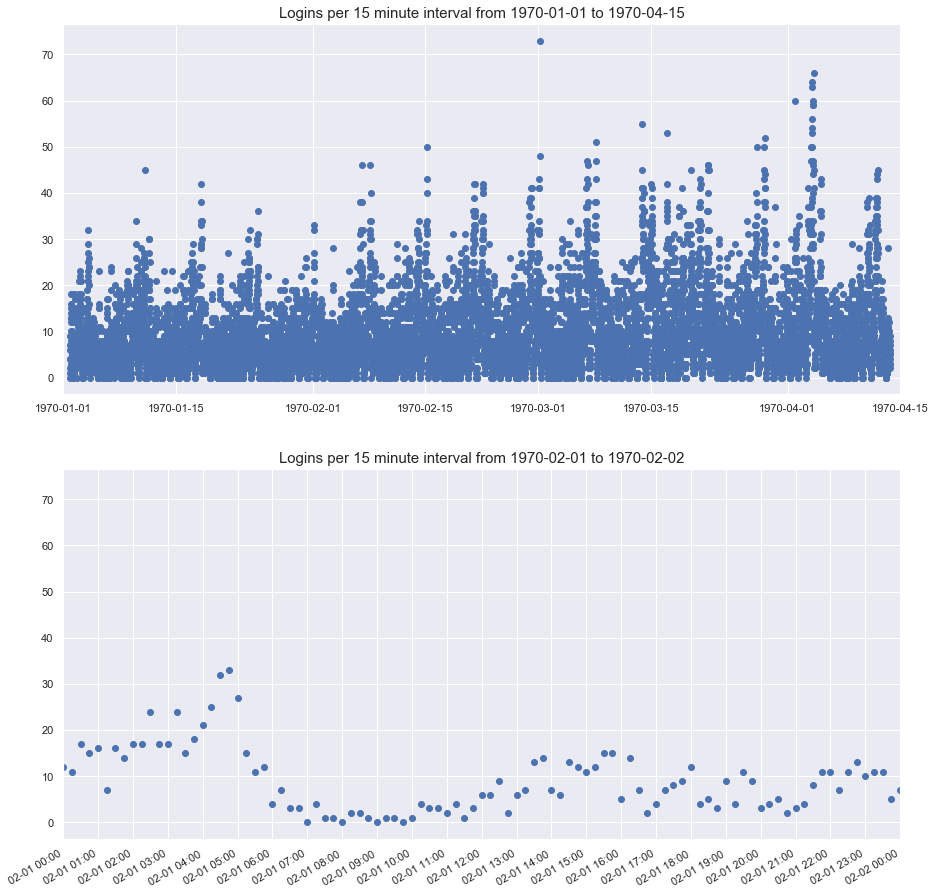

In [269]:
# grouped_logins_15_mins.head()
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,15))

ax1.plot_date(x='start_of_interval', y='counts', data=grouped_logins_15_mins)
ax2.plot_date(x='start_of_interval', y='counts', data=grouped_logins_15_mins)

ax1.set_xlim([datetime.date(1970, 1, 1), datetime.date(1970, 4, 15)])
ax1.set_title("Logins per 15 minute interval from 1970-01-01 to 1970-04-15", size=15)


ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=60))   #to get a tick every 15 minutes
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d %H:%M"))
ax2.set_xlim([datetime.date(1970, 2, 1), datetime.date(1970, 2, 2)])
ax2.set_title("Logins per 15 minute interval from 1970-02-01 to 1970-02-02", size=15)

plt.setp(plt.xticks()[1], rotation=30, ha='right');

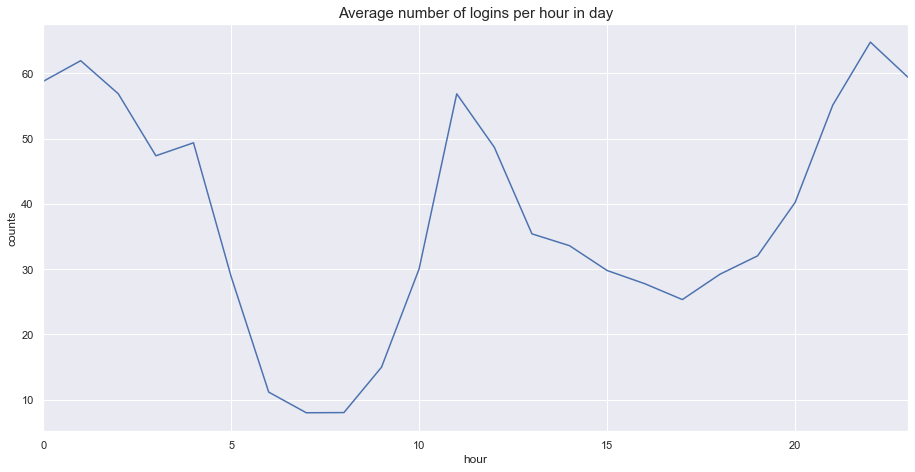

In [258]:
fig, ax = plt.subplots(figsize=(15.5, 7.5))

ax.set_xlim([0, 23])
ax.set_title('Average number of logins per hour in day', size=15)
sns.lineplot(x='hour', y='counts', data=grouped_logins_hour, ax=ax);

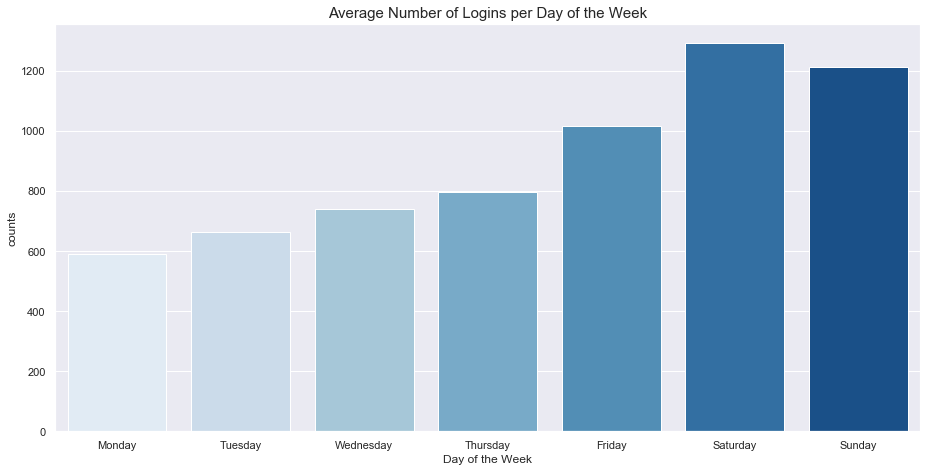

In [272]:
# Convert columns to categorical data
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_logins_day['day'] = pd.Categorical(grouped_logins_day['day'], categories=cats, ordered=True)
grouped_logins_day = grouped_logins_day.sort_values('day')

fig, ax = plt.subplots(figsize=(15.5, 7.5))

sns.barplot(x='day', y='counts', data=grouped_logins_day, ax=ax, palette='Blues')

ax.set_xlabel("Day of the Week")
ax.set_title("Average Number of Logins per Day of the Week", size=15);

From the plots shown above, it is clear there is a cyclical nature to the number of logins over time. From the first plot, three distinct peaks occur every 3 weeks. In order to get a clearer view, the 15-minute intervals for a single day were plotted in the subplot below the first. The line plot above clearly shows that the highest number of login requests occur between 20:00 and 04:00, with a slightly smaller peak occuring at approximately 11:00. Finally, the barplot clearly shows that as the week approaches the weekend, the number of logins increases.  

If we were to plot the the average number of logins per hour per day of the week, we would likely see a similar trend as seen in the line plot with each line being shifted upwards from the last as the week progresses.